# <span style="background-color: #F1F0F0; padding: 5px;">Introduction</span>

### Background:
> **Cyclistic**, a bike-share company in a bustling urban city, operates with a mission to provide accessible and environment-friendly transportation options to its citizens. With a diverse range of users from daily commuters to occasional riders, understanding the behavior and preferences of its clientele is vital. By diving deep into the usage patterns, Cyclistic hopes to tailor its services better and attract a larger user base, ultimately driving growth and sustainability for the company. The emphasis on converting casual riders to annual members is not just a revenue stream but also a commitment to sustainable living, fostering a community that chooses bicycles over cars for their daily commute.

### Objectives:
> 1. How do annual members and casual riders use Cyclistic bikes differently?
> 2. Design marketing strategies aimed at converting casual riders into annual members.

### Dataset Includes:
> Previous 12 months of Cyclistic trip data stored in the company's database. There are no issues with bias or credibility in this data.
> - **ride_id**: A unique identifier for each ride.
> - **rideable_type**: The type of bike used for the ride (e.g., electric, mountain).
> - **started_at**: Timestamp indicating when the ride started.
> - **ended_at**: Timestamp indicating when the ride ended.
> - **start_station_name**: Name of the station where the ride began.
> - **end_station_name**: Name of the station where the ride ended.
> - **end_station_id**: A unique identifier for the end station.
> - **start_lat**: Latitude of the start location.
> - **start_lng**: Longitude of the start location.
> - **end_lat**: Latitude of the end location.
> - **end_lng**: Longitude of the end location.
> - **member_casual**: Categorizes the rider as either a 'member' (annual member) or 'casual' rider.

# <span style="background-color: #F1F0F0; padding: 5px;">Data Loading</span>

In [1]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the directory containing the CSV files in Kaggle
path_to_csv = "/kaggle/input/cyclistic-trip-data/csv"

# Create an empty list to store DataFrames
all_dfs = []

In [3]:
# Loop through each month and read the corresponding CSV file into a DataFrame
for month in range(1, 13):
    # Format the month to be two digits (e.g., 01, 02, ..., 12)
    month_str = str(month).zfill(2)
    filename = os.path.join(path_to_csv, f"2021{month_str}-divvy-tripdata.csv")
    
    # Check if the file exists before reading it
    if os.path.exists(filename):
        df = pd.read_csv(filename, index_col=None, header=0)
        all_dfs.append(df)

# Concatenate all the DataFrames in the list into one DataFrame
combined_df = pd.concat(all_dfs, axis=0, ignore_index=True)
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


# <span style="background-color: #F1F0F0; padding: 5px;">Data Pre-processing and Cleaning</span>

In [4]:
# Ensure the dates are in the correct format
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'])

# Create a new column for trip duration
combined_df['ride_length'] = (combined_df['ended_at'] - combined_df['started_at']).dt.total_seconds() / 60

# Drop the rows where the duration is negative
combined_df = combined_df[combined_df['ride_length'] >= 0]

# Drop rows with missing values
combined_df = combined_df.dropna()

In [5]:
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7.216667
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,4.533333
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9.783333
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,8.950000
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,10.150000


# <span style="background-color: #F1F0F0; padding: 5px;">Data Analysis</span>

In [6]:
# Count the number of rides made by casual riders and members throughout 2021
ride_counts = combined_df.groupby('member_casual').size()
print(ride_counts)

member_casual
casual    2048335
member    2539851
dtype: int64


In [7]:
# Calculate the total trip duration for each user type
total_trip_time = combined_df.groupby('member_casual')['ride_length'].sum()
total_trip_time = total_trip_time.astype(int)
print(total_trip_time)

member_casual
casual    66590607
member    33484771
Name: ride_length, dtype: int64


In [8]:
# Calculate the avarage trip duration for each user type
average_duration = combined_df.groupby('member_casual')['ride_length'].mean()
print(average_duration)

member_casual
casual    32.509627
member    13.183754
Name: ride_length, dtype: float64


# <span style="background-color: #F1F0F0; padding: 5px;">Data Visualization</span>

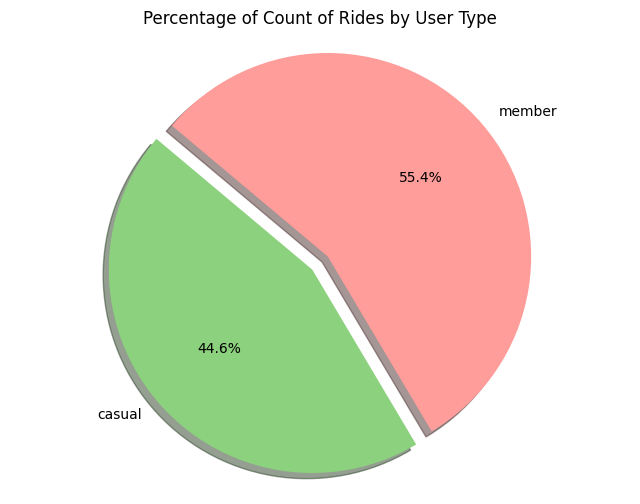

In [9]:
# Create a pie chart for count of rides by user type
labels = ride_counts.index
sizes = ride_counts
colors = ['#8CD17D', '#FF9D9A']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Count of Rides by User Type')
plt.axis('equal')
plt.show()

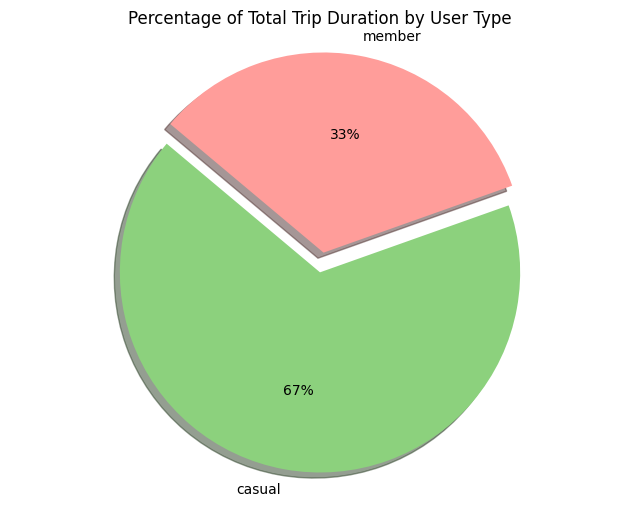

In [10]:
# Create a pie chart for total trip duration by user type
labels = total_trip_time.index
sizes = total_trip_time
colors = ['#8CD17D', '#FF9D9A']
explode = (0.1, 0)  # "explode" the first slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=140)
plt.title('Percentage of Total Trip Duration by User Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

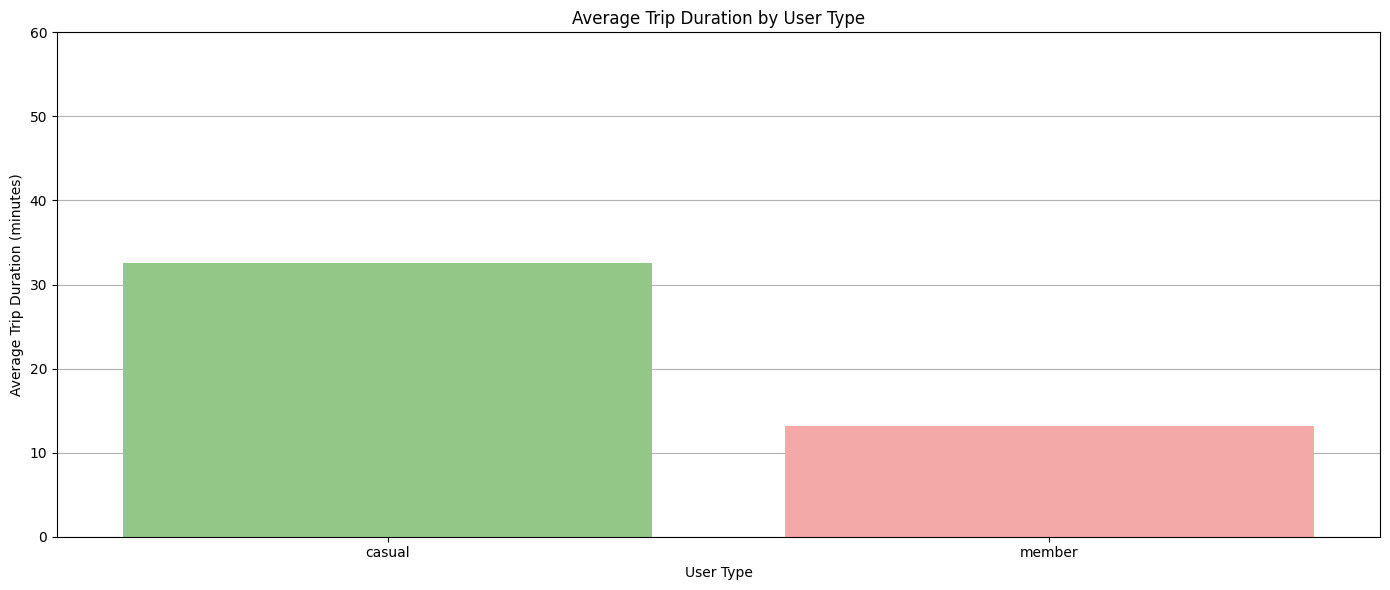

In [11]:
# Create a bar chart for average trip duration by user type
plt.figure(figsize=(14, 6))

sns.barplot(x=average_duration.index, y=average_duration, palette=colors, zorder=2)
plt.title('Average Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (minutes)')
plt.ylim([0, 60]) 
plt.grid(axis='y', zorder=1)

plt.tight_layout()
plt.show()

# <span style="background-color: #F1F0F0; padding: 5px;">Conclusion</span>

### Findings:
> 1. In 2021, <span style="color: #FF9D9A; font-weight: bold;">members</span> took more Cyclistic rides (2,539,851) than <span style="color: #8CD17D; font-weight: bold;">casual riders</span> (2,048,335).
> 2. <span style="color: #8CD17D; font-weight: bold;">Casual riders</span> had a higher total ride duration (66,590,607 minutes) compared to <span style="color: #FF9D9A; font-weight: bold;">members</span> (33,484,771 minutes).
> 3. <span style="color: #8CD17D; font-weight: bold;">Casual riders</span> had a higher average trip duration (32.51 minutes) than <span style="color: #FF9D9A; font-weight: bold;">members</span> (13.18 minutes).

### Suggestions:
> 1. **Promote the cost savings**: Given that casual riders take longer rides, they might not realize how much they could save by becoming a member, especially if the cost of membership is less than the cost of several long casual rides. We could use this insight to inform them about how much they could save per ride if they switch to the membership plan.
> 2. **Offer trial memberships**: Casual riders who take longer rides might be hesitant to commit to a membership without trying it first. Offering a one-week or one-month trial membership could provide these riders with the opportunity to experience the benefits of membership.
> 3. **Leverage usage data for personalized marketing**: We can use the data about their longer rides to personalize our marketing messages. For example, we can highlight how membership provides the freedom for long exploratory rides around the city without the worry of per-ride cost.